# Deep Learning Tutorial.
## Regression models.
### 1. Construct a multi-layer neural network model.
### 2. Tune the hyper-parameters for training a model.
### 3. Train a model on CPU or GPU.
### 4. Evaluate a model.
### 5. Save and load a model.

### Notes:
###  All of the code in this tutorial implemented in Tensorflow 2.1.0.

# boston_housing
## https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing
## http://lib.stat.cmu.edu/datasets/boston
## Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location  (in k\$).
## Variables in order
### 1.  CRIM     per capita crime rate by town
### 2.  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
### 3.  INDUS    proportion of non-retail business acres per town
### 4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
### 5.  NOX      nitric oxides concentration (parts per 10 million)
### 6.  RM       average number of rooms per dwelling
### 7.  AGE      proportion of owner-occupied units built prior to 1940
### 8.  DIS      weighted distances to five Boston employment centres
### 9.  RAD      index of accessibility to radial highways
### 10.  TAX      full-value property-tax rate per \$10,000
### 11.  PTRATIO  pupil-teacher ratio by town
### 12.  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
### 13.  LSTAT    % lower status of the population
### 14. (Label) MEDV     Median value of owner-occupied homes in $1000's



# Install the following:
## pip install tensorflow
## pip install git+https://github.com/tensorflow/docs




In [1]:
# for the operating system operations e.g., creating a folder.
import os

# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Print tensorfow (TF) version. Make sure you have at least tensorflow 2.1.0
print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.3.0


In [2]:
# import the dataset.
# from tensorflow.keras.datasets import boston_housing

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [10]:
# Tensorflow untils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [11]:
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [12]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)


# uncomment the following line to use a GPU (Graphical Processing Unit) 
#if you have it available at your machine. This unit will make your code run faster.
# tf.config.experimental.list_physical_devices('GPU')  

In [13]:
# (X_train, y_train), (X_test, y_test) = boston_housing.load_data()
# Downloaded the data from https://github.com/selva86/datasets/edit/master/BostonHousing.csv
all_ds = pd.read_csv('BostonHousing.csv')

In [62]:
all_ds.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
253,0.36894,22.0,5.86,0,0.431,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
187,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398,15.2,393.87,6.68,32.0
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8,388.74,10.45,18.5


In [15]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')

Number of rows/examples and columns in the dataset: (506, 14)


In [16]:
# Summary of information on the dataset.
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Cleaning the data.

In [17]:
print("Display NA values in each columns: ")
all_ds.isna().sum(axis=0)

Display NA values in each columns: 


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [18]:
print("Display NA values in each row: ")
all_ds.isna().sum(axis=1)

Display NA values in each row: 


0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Length: 506, dtype: int64

In [19]:
print("Display NULL values in each columns: ")
all_ds.isnull().sum()

Display NULL values in each columns: 


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [20]:
print("Display NULL values in each row: ")
all_ds.isnull().sum(1)

Display NULL values in each row: 


0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Length: 506, dtype: int64

In [21]:
# Remove the rows with NA values.
all_ds = all_ds.dropna()

# You can also use the following line to fill the NA with Zeros.
# all_ds = all_ds.fillna(0)
# all_ds = all_ds.fillna(mean_of_column)



In [22]:
# slice the data set and keep last n rows of the dataset.  E.g., you want to save the last 20 rows from the dataset into a new dataset.
n = 20
temp_ds = all_ds[:n]
temp_ds.shape

(20, 14)

# Sample the dataset randomly and return fraction (e.g., frac=50% will return 50% of the data) from the dataset.

In [23]:
# all_ds[10:]
# all_ds.sample(frac=1) # this will shuffle all of the dataset and randomly re-organize the rows.

all_ds = all_ds.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)
all_ds_90pct = all_ds.sample(frac=0.9) # randomly sample the dataset and keep 90% of the rows.
all_ds_90pct.shape

(455, 14)

# Split the data into train/test splits.

In [24]:
# THis is an alternative method to split the data and replace train_test_split.
# train_dataset = all_ds_90pct.sample(frac=0.6) # This will select 80
# test_dataset = all_ds_90pct.drop(train_dataset.index)

In [25]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_ds_90pct, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(273, 14)
(182, 14)


In [26]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(91, 14)
(91, 14)


In [27]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (273, 14)
 Test dataset       : (91, 14)
 Validation dataset : (91, 14)


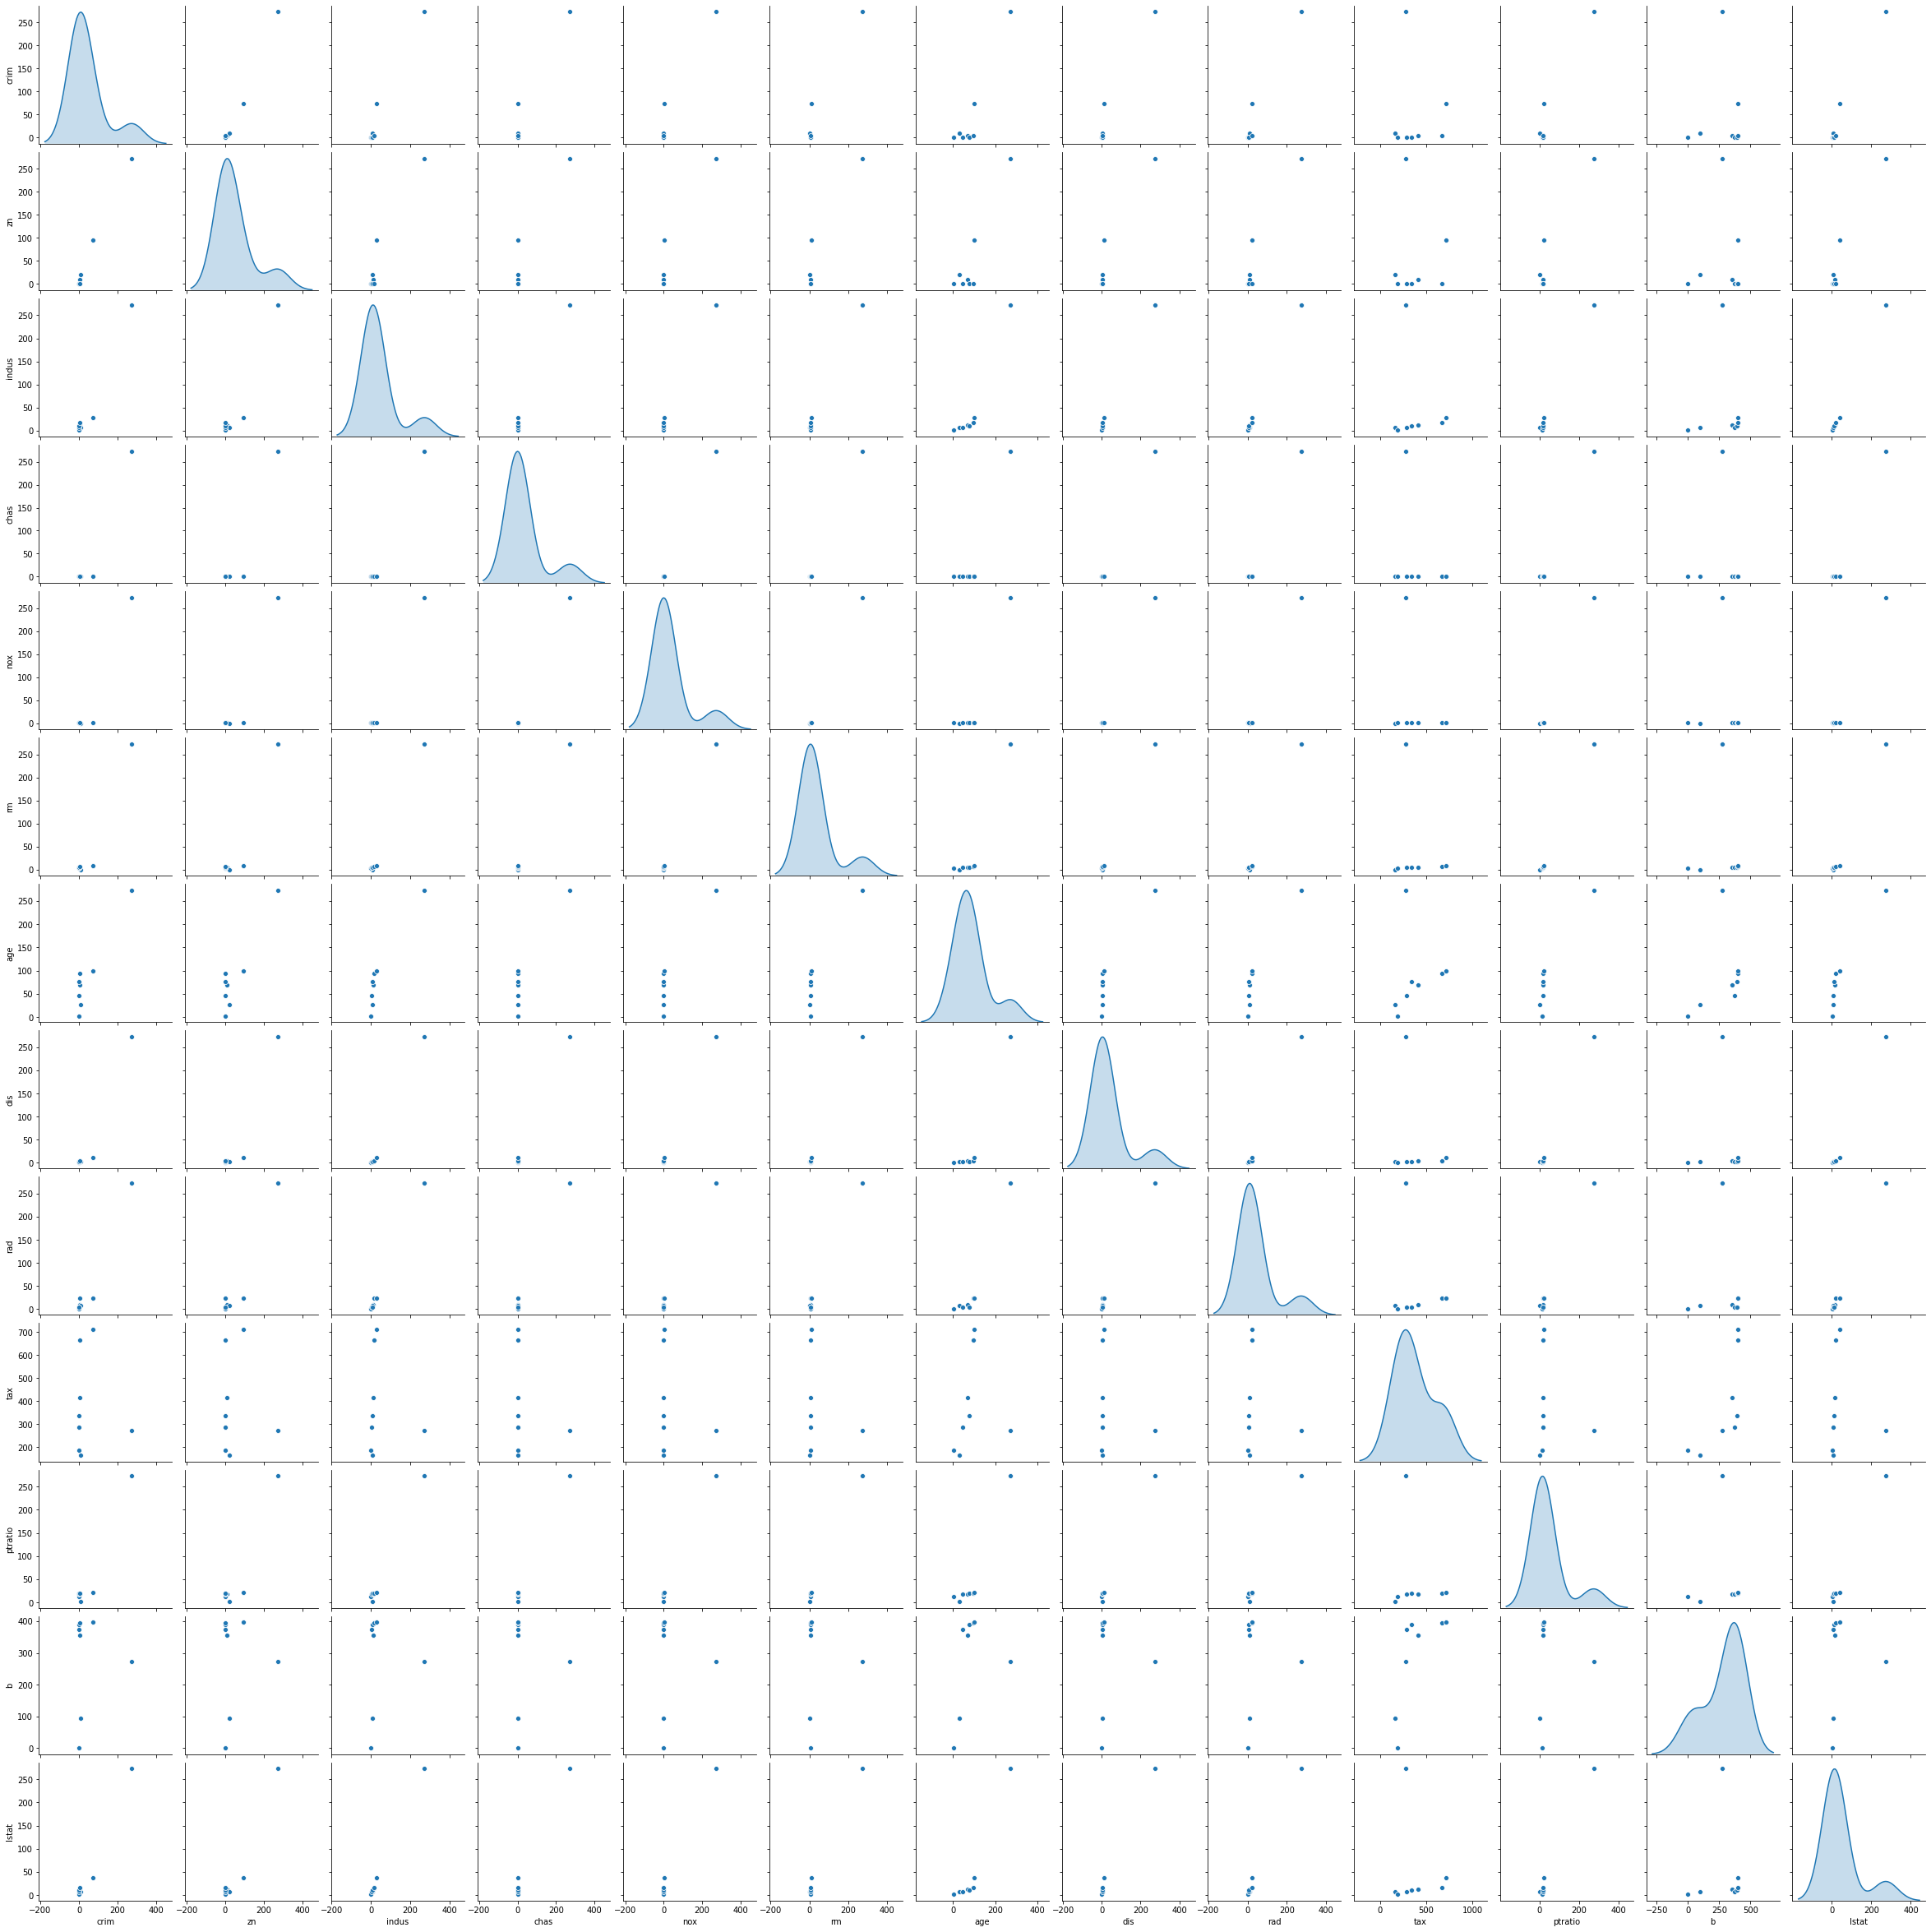

In [28]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("medv")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'


In [29]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("medv")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
crim,273.0,3.876580,9.224158,0.00632,0.08873,0.2909,3.53501,73.5341
zn,273.0,9.075092,20.544313,0.00000,0.00000,0.0000,0.00000,95.0000
indus,273.0,11.439084,6.740505,0.46000,5.86000,9.9000,18.10000,27.7400
chas,273.0,0.058608,0.235321,0.00000,0.00000,0.0000,0.00000,1.0000
nox,273.0,0.558281,0.115383,0.38500,0.45800,0.5380,0.62400,0.8710
rm,273.0,6.205674,0.651633,4.13800,5.86900,6.1440,6.49500,8.2970
age,273.0,69.339927,27.601836,2.90000,46.70000,76.7000,94.10000,100.0000
dis,273.0,3.794550,2.112633,1.13700,2.07880,3.3175,5.10040,12.1265
rad,273.0,9.520147,8.627107,1.00000,4.00000,5.0000,24.00000,24.0000
tax,273.0,413.106227,164.922040,187.00000,287.00000,337.0000,666.00000,711.0000


# The label is "Median Value" of the house. We will remove them from each dataset split (train, test, validate) and save them into new variables.
## Note: we maintain the order of the labels and data from now on to make sure each example/row is associated with the right label.

In [30]:

train_labels = train_dataset.pop('medv')
test_labels = test_dataset.pop('medv')
valid_labels = valid_dataset.pop('medv')

# Data Normalization/Scaling
## Subtract the mean of the training data and divide by the standard deviation of the training data.

In [31]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)


In [32]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')


Train/Test/Validate splits: 
Train    : (273, 13) 
Test     : (91, 13) 
Validate : (91, 13) 
Train/Test/Validate labels: 
Train Labels : (273,) 
Test Labels  : (91,) 
Test Labels  : (91,) 


In [33]:
# show a sample of the data after normalized
normed_train_data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
360,0.072130,-0.441733,0.988192,-0.249056,1.834923,0.295145,0.676045,-0.604151,1.678413,1.533414,0.737844,0.211170,-0.748387
169,-0.154708,-0.441733,1.207761,-0.249056,0.404904,0.301283,0.936897,-0.725185,-0.523947,-0.061279,-1.778334,-0.268428,-0.250274
481,0.198566,-0.441733,0.988192,-0.249056,-0.227771,0.835326,0.201439,-0.219087,1.678413,1.533414,0.737844,0.410571,-0.755443
136,-0.385286,-0.441733,1.550465,-0.249056,0.569573,-0.404636,0.875307,-0.865105,-0.639861,0.144879,1.195331,0.250921,0.537112
281,-0.416247,0.531773,-1.203038,-0.249056,-0.999982,1.169870,-1.164413,0.686418,-0.523947,-1.195148,-1.686837,0.401522,-1.199935
113,-0.396184,-0.441733,-0.212014,-0.249056,-0.097770,-0.174445,0.944143,-0.590046,-0.408033,0.114562,-0.360124,0.451831,0.563923
345,-0.416889,-0.441733,-1.045780,-0.249056,-1.007782,-0.294144,-0.755020,1.997058,-0.755774,-0.370516,0.097363,0.330531,-0.361750
442,0.194033,-0.441733,0.988192,-0.249056,1.574920,0.020450,1.110798,-0.847165,1.678413,1.533414,0.737844,0.438796,0.493368
456,0.085889,-0.441733,0.988192,-0.249056,1.340917,-0.352459,0.672422,-0.574615,1.678413,1.533414,0.737844,-3.710933,0.834851
104,-0.405130,-0.441733,-0.427132,-0.249056,-0.331773,-0.059349,0.748504,-0.650160,-0.523947,-0.176485,1.058085,0.406478,-0.107754


# Build a Neural Network Model 

In [34]:
# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(10, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(50,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    model.add(Dense(50, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model


In [35]:
model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 3,291
Trainable params: 3,291
Non-trainable params: 0
_________________________________________________________________


In [36]:
# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 12,065
Trainable params: 12,065
Non-trainable params: 0
_________________________________________________________________


In [37]:
# We decalred a function for creating a model.
def build_model3_five_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(64,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()

Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)    

In [38]:
# Test the model before training (this will use the initial weights.) which in fact will generate random values.
example_batch = normed_train_data[:10] # take the first 10 data points from the training data.
example_result = model.predict(example_batch)
example_result

array([[-0.48839915],
       [-0.38099518],
       [-0.4740957 ],
       [-0.5585283 ],
       [-0.06599195],
       [-0.04396331],
       [-0.534732  ],
       [-0.5507402 ],
       [-0.8993965 ],
       [-0.1635363 ]], dtype=float32)

# Save checkpoints during training

In [39]:
# pip install -q pyyaml h5py  # Required to save models in HDF5 format

checkpoint_path = r".\models\house_prediction.ckpt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_loss', # or val_accuracy if you have it.
                                                 save_best_only=True, # Default false. If you don't change the file name then the output will be overritten at each step and only the last model will be saved.
                                                 save_weights_only=True, # True => model.save_weights (weights and no structure, you need JSON file for structure), False => model.save (saves weights & structure)
                                                 verbose=0,
                                                  )

# epoch

# Training the model we built above.

In [40]:
%%time
EPOCHS = 500
batch_size = 32 # 6 iteration

model = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), 
                 ckpt_callback
                  ],
        
    )



Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 12,065
Trainable params: 12,065
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:205.3981,  mae:11.3911,  mape:57.7011,  mse:205.3981,  val_loss:46

In [41]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,4.502590,1.540611,4.502590,6.861724,33.444557,3.570688,33.444557,17.266134,495
496,1.622500,0.895547,1.622500,4.094720,30.661922,3.300912,30.661922,16.355751,496
497,1.949053,1.084577,1.949053,5.323722,31.300255,3.162564,31.300255,15.898538,497
498,1.994594,1.054637,1.994594,5.165699,34.540516,3.892159,34.540516,18.027225,498
499,2.007668,1.007814,2.007668,4.781777,30.723520,3.111587,30.723520,15.583472,499


# See some of the model results

In [42]:
# normed_train_data.pop('medv')
# Test the model after training.
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[24.823845],
       [22.247332],
       [22.864393],
       [16.881184],
       [34.38459 ],
       [18.031103],
       [17.769241],
       [17.35893 ],
       [12.886645],
       [18.847696]], dtype=float32)

In [43]:
print('The ground truth: ')
train_labels[:10]

The ground truth: 


360    25.0
169    22.3
481    23.7
136    17.4
281    35.4
113    18.7
345    17.5
442    18.4
456    12.7
104    20.1
Name: medv, dtype: float64

In [63]:
# normed_train_data.pop('medv')
# Test the model after training.
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[25.361673],
       [29.169382],
       [22.300455],
       [12.614345],
       [15.340643],
       [20.652166],
       [26.256605],
       [20.12683 ],
       [45.021088],
       [30.447807]], dtype=float32)

In [64]:
print('The ground truth: ')
test_labels[:10]

The ground truth: 


65     23.5
292    27.9
501    22.4
466    19.0
48     14.4
131    19.6
302    26.4
494    24.5
228    46.7
277    33.1
Name: medv, dtype: float64

# See how the training went by plotting the loss/mse across epochs


In [44]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [medv]')

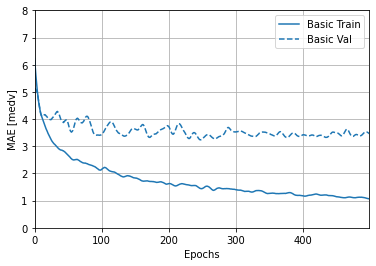

In [67]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 8])
plt.ylabel('MAE [medv]')

Text(0, 0.5, 'MSE [medv^2]')

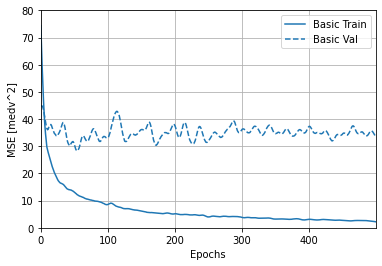

In [69]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 80])
plt.ylabel('MSE [medv^2]')

In [70]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model.evaluate(normed_train_data, train_labels, verbose=2)

print("Train set Mean Abs Error    : {:5.2f} medv".format(mae))
print("Train set Mean Squared Error: {:5.2f} medv".format(mse))

Error Rate on Train Split: 
9/9 - 0s - loss: 1.1284 - mae: 0.7477 - mse: 1.1284 - mape: 3.7817
Train set Mean Abs Error    :  0.75 medv
Train set Mean Squared Error:  1.13 medv


In [71]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse, mape = model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Validation set Mean Abs Error    : {:5.2f} medv".format(mae))
print("Validation set Mean Squared Error: {:5.2f} medv".format(mse))

Error Rate on Evaluation Split: 
3/3 - 0s - loss: 30.7235 - mae: 3.1116 - mse: 30.7235 - mape: 15.5835
Validation set Mean Abs Error    :  3.11 medv
Validation set Mean Squared Error: 30.72 medv


In [72]:
print('Error Rate on Test Split: ')
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error    : {:5.2f} medv".format(mae))
print("Testing set Mean Squared Error: {:5.2f} medv".format(mse))

Error Rate on Test Split: 
3/3 - 0s - loss: 17.1224 - mae: 2.5781 - mse: 17.1224 - mape: 13.5038
Testing set Mean Abs Error    :  2.58 medv
Testing set Mean Squared Error: 17.12 medv


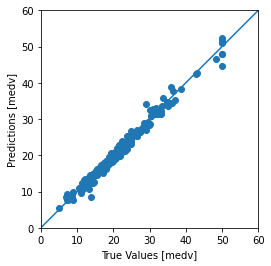

In [77]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

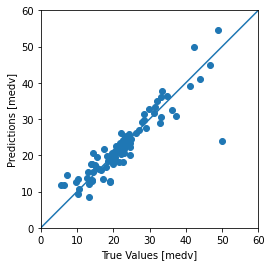

In [78]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

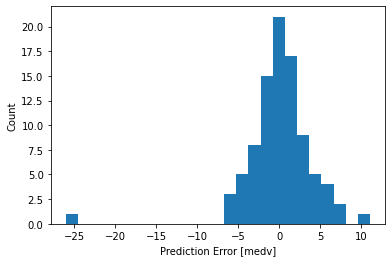

In [79]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("Count")

# Save and load the model (weights)
# https://www.tensorflow.org/tutorials/keras/save_and_load

## a. Manually save weights only (no structure will be saved)


In [83]:
# a. Manually save weights only (no structure will be saved)
#################################

# Save the weights
model.save_weights('./model_weights/my_checkpoint')

# Create a new model instance
model = build_model2_three_hidden_layers()

# Restore the weights
model.load_weights('./model_weights/my_checkpoint')

# Evaluate the model
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} medv".format(mae))

3/3 - 0s - loss: 17.1224 - mae: 2.5781 - mse: 17.1224 - mape: 13.5038
Testing set Mean Abs Error:  2.58 medv
